# Disclaimer
えいやっと書いたものなので、細かいところにツッコミどころがあるかもしれませんがご容赦ください。

In [26]:
import math, sys, functools, os, codecs
from glob import glob
import sqlite3
import numpy as np
import numpy.random as rd
from numpy import matrix
import pandas as pd
import scipy as sp
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
from itertools import chain
import multiprocessing as mp

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)

import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]
%matplotlib inline

%config InlineBackend.figure_format='retina'
# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'


def current_time():
    return dt.strftime(dt.now(),'%Y-%m-%d %H:%M:%S')
    import math, sys, functools, os, codecs
from glob import glob
import sqlite3
import numpy as np
import numpy.random as rd
from numpy import matrix
import pandas as pd
import scipy as sp
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
from itertools import chain
import multiprocessing as mp

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)

import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]
%matplotlib inline

# %config InlineBackend.figure_format='retina'
# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'


def current_time():
    return dt.strftime(dt.now(),'%Y-%m-%d %H:%M:%S')
    

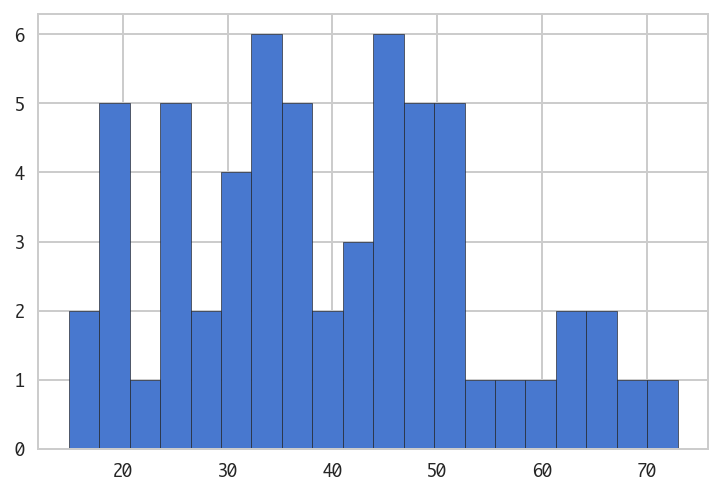

In [80]:
rd.seed(74)

m_m = 50
m_w = 40
m_c = 25

s_m = 10
s_w = 8
s_c = 4
s   = 5

mu_man   = st.norm.rvs(m_m, s_m,size=20)
mu_woman = st.norm.rvs(m_w, s_w,size=20)
mu_child = st.norm.rvs(m_c, s_c,size=20)
x_obs = st.norm.rvs(np.r_[mu_man,mu_woman,mu_child], s, size=(len(mu_man)+len(mu_woman)+len(mu_child)))
plt.hist(x_obs,bins=20)
plt.show()

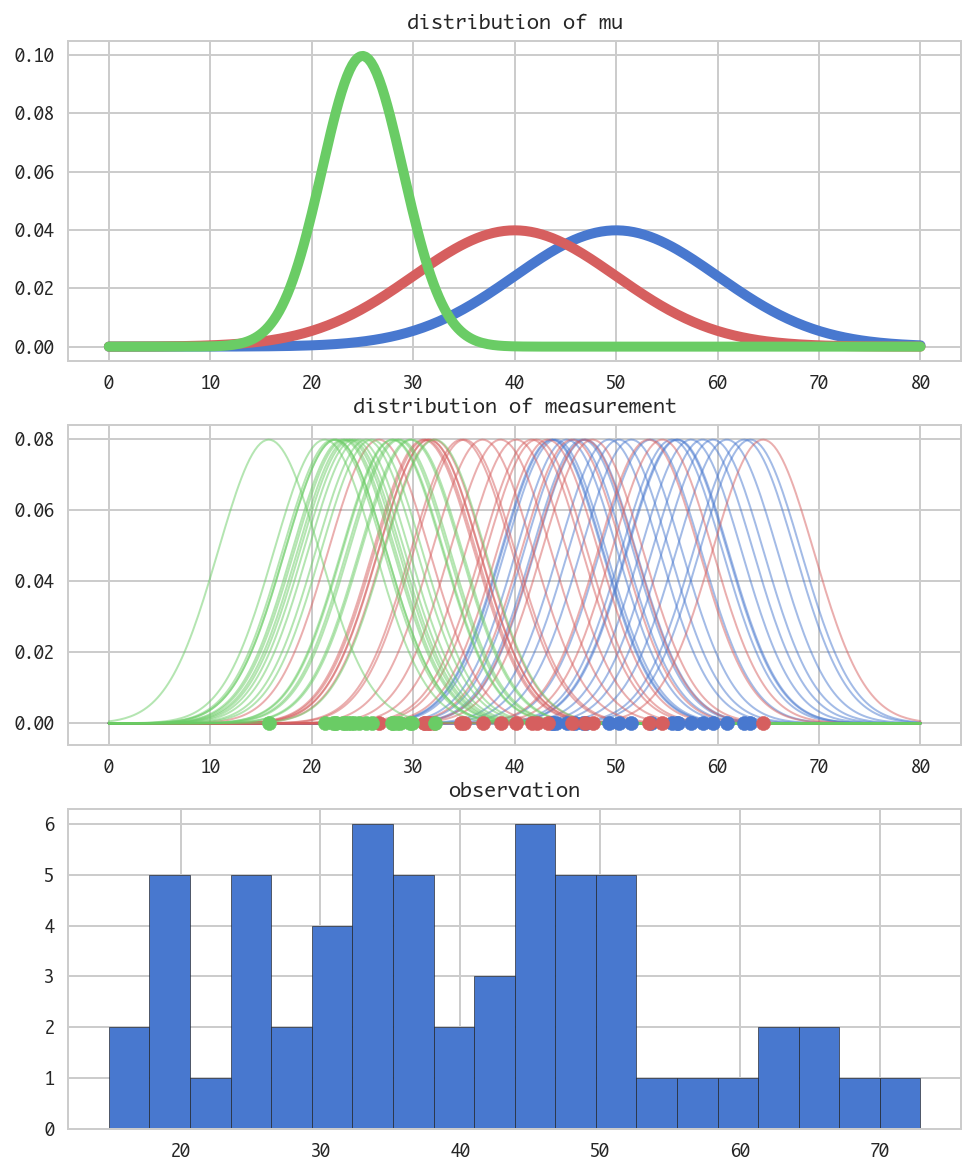

In [82]:
plt.figure(figsize=(8,10))
ax = plt.subplot(311)
ax.set_title('distribution of mu')
plt.plot(xx, st.norm.pdf(xx, m_m, s_m), 'b', alpha=1, lw=5)
plt.plot(xx, st.norm.pdf(xx, m_w, s_m), 'r', alpha=1, lw=5)
plt.plot(xx, st.norm.pdf(xx, m_c, s_c), 'g', alpha=1, lw=5)

ax = plt.subplot(312)
ax.set_title('distribution of measurement')
xx = np.linspace(0, 80, 301)
for m in mu_man:
    plt.plot(xx, st.norm.pdf(xx, m, s), 'b', alpha=0.5, lw=1)
    plt.scatter(m, 0, c='b', zorder=100)
    
for m in mu_woman:
    plt.plot(xx, st.norm.pdf(xx, m, s), 'r', alpha=0.5, lw=1)
    plt.scatter(m, 0, c='r', zorder=100)
    
for m in mu_child:
    plt.plot(xx, st.norm.pdf(xx, m, s), 'g', alpha=0.5, lw=1)
    plt.scatter(m, 0, c='g', zorder=100)
    
ax = plt.subplot(313)
ax.set_title('observation')    
plt.hist(x_obs,bins=20)
plt.show()
